In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\spam.csv")

In [3]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [4]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
l=LabelEncoder()
df['target']=l.fit_transform(df['target'])

In [7]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['target'],test_size=0.2,random_state=0)

In [10]:
X_train.shape

(4457,)

In [11]:
y_test.shape

(1115,)

<Axes: >

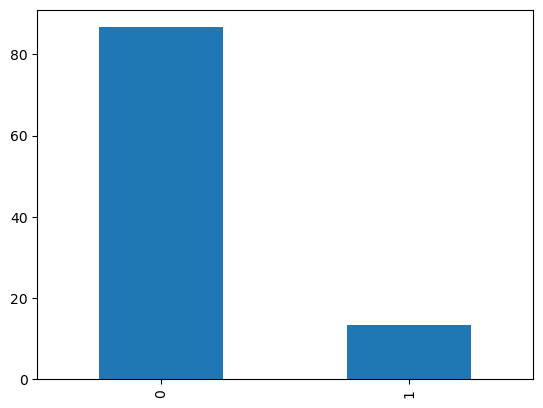

In [12]:
(df['target'].value_counts()/len(df)*100).plot(kind='bar')

In [13]:
len(df[df['target']==1])

747

In [14]:
len(df)

5572

In [15]:
len(df[df['target']==1])/len(df)*100

13.406317300789663

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer()

In [18]:
X_train1=cv.fit_transform(X_train)

In [19]:
X_train1

<4457x7612 sparse matrix of type '<class 'numpy.int64'>'
	with 58826 stored elements in Compressed Sparse Row format>

In [20]:
cv

CountVectorizer()

In [21]:
cv.vocabulary_

{'no': 4700,
 'this': 6717,
 'is': 3682,
 'kallis': 3818,
 'home': 3415,
 'ground': 3197,
 'amla': 905,
 'town': 6866,
 'durban': 2459,
 'am': 897,
 'in': 3575,
 'escape': 2599,
 'theatre': 6683,
 'now': 4750,
 'going': 3117,
 'to': 6799,
 'watch': 7254,
 'kavalan': 3830,
 'few': 2769,
 'minutes': 4418,
 'we': 7274,
 'walked': 7218,
 'from': 2967,
 'my': 4576,
 'moms': 4477,
 'right': 5673,
 'on': 4841,
 'stagwood': 6309,
 'pass': 5006,
 'winterstone': 7392,
 'left': 3991,
 'victors': 7137,
 'hill': 3371,
 'address': 780,
 'lt': 4170,
 'gt': 3204,
 'dunno': 2458,
 'they': 6701,
 'close': 1815,
 'oredi': 4890,
 'not': 4737,
 'ìï': 7604,
 'ma': 4211,
 'fan': 2719,
 'yo': 7557,
 'im': 3549,
 'by': 1552,
 'work': 7450,
 'its': 3698,
 'ur': 7063,
 'luck': 4175,
 'love': 4150,
 'someone': 6179,
 'fortune': 2907,
 'the': 6681,
 'one': 4845,
 'who': 7354,
 'loves': 4158,
 'but': 1538,
 'he': 3306,
 'also': 889,
 'knows': 3886,
 'about': 723,
 'lunch': 4182,
 'menu': 4367,
 'only': 4851,
 'da':

In [22]:
m=max(cv.vocabulary_,key=len)

In [23]:
m

'com1win150ppmx3age16subscription'

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb=MultinomialNB(alpha=0.1)

In [26]:
mnb.fit(X_train1,y_train)

MultinomialNB(alpha=0.1)

In [27]:
from sklearn.metrics import roc_auc_score

In [28]:
X_test1=cv.transform(X_test)

In [29]:
y_pred=mnb.predict(X_test1)

In [30]:
roc_auc_score(y_test,y_pred)

0.9723646958751762

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
t=TfidfVectorizer()

In [33]:
X_train2=t.fit_transform(X_train)
X_test2=t.transform(X_test)

In [34]:
t.vocabulary_

{'no': 4700,
 'this': 6717,
 'is': 3682,
 'kallis': 3818,
 'home': 3415,
 'ground': 3197,
 'amla': 905,
 'town': 6866,
 'durban': 2459,
 'am': 897,
 'in': 3575,
 'escape': 2599,
 'theatre': 6683,
 'now': 4750,
 'going': 3117,
 'to': 6799,
 'watch': 7254,
 'kavalan': 3830,
 'few': 2769,
 'minutes': 4418,
 'we': 7274,
 'walked': 7218,
 'from': 2967,
 'my': 4576,
 'moms': 4477,
 'right': 5673,
 'on': 4841,
 'stagwood': 6309,
 'pass': 5006,
 'winterstone': 7392,
 'left': 3991,
 'victors': 7137,
 'hill': 3371,
 'address': 780,
 'lt': 4170,
 'gt': 3204,
 'dunno': 2458,
 'they': 6701,
 'close': 1815,
 'oredi': 4890,
 'not': 4737,
 'ìï': 7604,
 'ma': 4211,
 'fan': 2719,
 'yo': 7557,
 'im': 3549,
 'by': 1552,
 'work': 7450,
 'its': 3698,
 'ur': 7063,
 'luck': 4175,
 'love': 4150,
 'someone': 6179,
 'fortune': 2907,
 'the': 6681,
 'one': 4845,
 'who': 7354,
 'loves': 4158,
 'but': 1538,
 'he': 3306,
 'also': 889,
 'knows': 3886,
 'about': 723,
 'lunch': 4182,
 'menu': 4367,
 'only': 4851,
 'da':

In [37]:
t

TfidfVectorizer()

In [41]:
len(t.get_feature_names_out())

7612

In [46]:
names=t.get_feature_names_out()

In [47]:
names

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [49]:
tf=X_train2.toarray()

In [50]:
tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
max_feature=np.max(tf,axis=0)

In [52]:
max_feature

array([0.23810667, 0.50951705, 0.22936625, ..., 0.2794812 , 0.46529646,
       0.35227608])

In [54]:
d=pd.Series(max_feature,index=t.get_feature_names_out())

In [55]:
d

00              0.238107
000             0.509517
000pes          0.229366
008704050406    0.261639
0089            0.244211
                  ...   
û_thanks        0.568774
ûï              0.285227
ûïharry         0.279481
ûò              0.465296
ûówell          0.352276
Length: 7612, dtype: float64

In [60]:
x=d.sort_values()

In [61]:
x

craziest      0.072395
sambar        0.072395
sorrows       0.072395
attraction    0.072395
makiing       0.072395
                ...   
146tf150p     1.000000
thanx         1.000000
yup           1.000000
ok            1.000000
thank         1.000000
Length: 7612, dtype: float64

In [62]:
min=x.head(20)

In [63]:
max=x.tail(20)

In [64]:
min

craziest        0.072395
sambar          0.072395
sorrows         0.072395
attraction      0.072395
makiing         0.072395
praises         0.072395
proove          0.072395
aaniye          0.074700
psychiatrist    0.074700
healer          0.074700
chef            0.074700
pudunga         0.074700
dependable      0.074700
sympathetic     0.074700
determined      0.074700
exterminator    0.074700
pest            0.074700
courageous      0.074700
listener        0.074700
athletic        0.074700
dtype: float64

In [65]:
max

tick              0.980336
er                1.000000
home              1.000000
havent            1.000000
too               1.000000
645               1.000000
beerage           1.000000
nite              1.000000
lei               1.000000
congratulation    1.000000
where             1.000000
anything          1.000000
anytime           1.000000
done              1.000000
okie              1.000000
146tf150p         1.000000
thanx             1.000000
yup               1.000000
ok                1.000000
thank             1.000000
dtype: float64

In [66]:
type(min)

pandas.core.series.Series

In [70]:
min.groupby(min.index).apply(lambda x: x.sort_index())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25164\895784924.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  min.groupby(min.index).apply(lambda x: x.sort_index())


craziest        0.072395
sambar          0.072395
sorrows         0.072395
attraction      0.072395
makiing         0.072395
praises         0.072395
proove          0.072395
aaniye          0.074700
psychiatrist    0.074700
healer          0.074700
chef            0.074700
pudunga         0.074700
dependable      0.074700
sympathetic     0.074700
determined      0.074700
exterminator    0.074700
pest            0.074700
courageous      0.074700
listener        0.074700
athletic        0.074700
dtype: float64

In [71]:
t2=TfidfVectorizer(min_df=3)

In [72]:
X_train3=t2.fit_transform(X_train)
X_test3=t2.transform(X_test)

In [74]:
mnb2=MultinomialNB(alpha=0.1)

In [76]:
mnb2.fit(X_train3,y_train)

MultinomialNB(alpha=0.1)

In [77]:
y_pred2=mnb2.predict(X_test3)

In [78]:
roc_auc_score(y_test,y_pred2)

0.9332080693691521

In [79]:
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [80]:
spam=df[df['target']==1]

In [81]:
len(spam)

747

In [84]:
from nltk.tokenize import word_tokenize
spam['len']=spam['text'].apply(lambda x : len(word_tokenize(x)))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25164\4071202893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam['len']=spam['text'].apply(lambda x : len(word_tokenize(x)))


In [85]:
spam

,text,target,len
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
5,FreeMsg Hey there darling it's been 3 week's n...,1,39
8,WINNER!! As a valued network customer you have...,1,32
9,Had your mobile 11 months or more? U R entitle...,1,31
11,"SIX chances to win CASH! From 100 to 20,000 po...",1,31
...,...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414...,1,18
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,38
5547,Had your contract mobile 11 Mnths? Latest Moto...,1,35
5566,REMINDER FROM O2: To get 2.50 pounds free call...,1,30


In [86]:
spam['len'].sum()

20835

In [87]:
df['len']=df['text'].apply(lambda x: len(word_tokenize(x)))

In [88]:
df

,text,target,len
0,"Go until jurong point, crazy.. Available only ...",0,24
1,Ok lar... Joking wif u oni...,0,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
3,U dun say so early hor... U c already then say...,0,13
4,"Nah I don't think he goes to usf, he lives aro...",0,15
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35
5568,Will Ì_ b going to esplanade fr home?,0,9
5569,"Pity, * was in mood for that. So...any other s...",0,15
5570,The guy did some bitching but I acted like i'd...,0,27


In [89]:
len_spam=df[df['target']==1]['len'].sum()

In [90]:
len_spam

20835

In [91]:
len_ham=df[df['target']==0]['len'].sum()

In [92]:
len_ham

83337

In [93]:
avg_spam=len_spam/len(df[df['target']==1])

In [94]:
avg_ham=len_ham/len(df[df['target']==0])

In [96]:
avg_spam

27.89156626506024

In [97]:
avg_ham

17.271917098445595

In [98]:
t3=TfidfVectorizer(min_df=5)

In [101]:
X_t,X_te,y_T,y_te=train_test_split(df.drop(columns=['len','target']),df['target'],test_size=0.2,random_state=0)

In [103]:
t3

TfidfVectorizer(min_df=5)

In [104]:
X_t

,text
1114,No no:)this is kallis home ground.amla home to...
3589,I am in escape theatre now. . Going to watch K...
3095,We walked from my moms. Right on stagwood pass...
1012,I dunno they close oredi not... ÌÏ v ma fan...
3320,Yo im right by yo work
...,...
4931,Match started.india &lt;#&gt; for 2
3264,"44 7732584351, Do you want a New Nokia 3510i c..."
1653,I was at bugis juz now wat... But now i'm walk...
2607,:-) yeah! Lol. Luckily i didn't have a starrin...


In [105]:
X_t=t3.fit_transform(X_train)

In [106]:
X_te=t3.transform(X_test)

In [108]:
from sklearn.svm import SVC

In [109]:
s=SVC(C=10000)

In [110]:
s

SVC(C=10000)

In [112]:
def add_feature(X,new):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [115]:
s.fit(X_t,y_train)

SVC(C=10000)

In [116]:
y_pred3=s.predict(X_te)

In [117]:
roc_auc_score(y_test,y_pred3
            )

0.9482683103330075

In [118]:
df

,text,target,len
0,"Go until jurong point, crazy.. Available only ...",0,24
1,Ok lar... Joking wif u oni...,0,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37
3,U dun say so early hor... U c already then say...,0,13
4,"Nah I don't think he goes to usf, he lives aro...",0,15
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35
5568,Will Ì_ b going to esplanade fr home?,0,9
5569,"Pity, * was in mood for that. So...any other s...",0,15
5570,The guy did some bitching but I acted like i'd...,0,27


In [119]:
import re

In [120]:
pattern=re.compile(r'\d')

In [121]:
df['digit']=df['text'].apply(lambda x: len(re.findall(pattern,x)))

In [122]:
df

,text,target,len,digit
0,"Go until jurong point, crazy.. Available only ...",0,24,0
1,Ok lar... Joking wif u oni...,0,8,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37,25
3,U dun say so early hor... U c already then say...,0,13,0
4,"Nah I don't think he goes to usf, he lives aro...",0,15,0
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35,21
5568,Will Ì_ b going to esplanade fr home?,0,9,0
5569,"Pity, * was in mood for that. So...any other s...",0,15,0
5570,The guy did some bitching but I acted like i'd...,0,27,0


In [123]:
df.head(3).values

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        0, 24, 0],
       ['Ok lar... Joking wif u oni...', 0, 8, 0],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        1, 37, 25]], dtype=object)

In [124]:
ls=len(df[df['target']==1])
lh=len(df[df['target']==0])

In [125]:
ls

747

In [126]:
lh

4825

In [127]:
spam_sum_digit=df[df['target']==1]['digit'].sum()

In [128]:
ham_sum_digit=df[df['target']==0]['digit'].sum()

In [130]:
spam_sum_digit/ls

15.759036144578314

In [131]:
ham_sum_digit/lh

0.2992746113989637

In [132]:
df

,text,target,len,digit
0,"Go until jurong point, crazy.. Available only ...",0,24,0
1,Ok lar... Joking wif u oni...,0,8,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37,25
3,U dun say so early hor... U c already then say...,0,13,0
4,"Nah I don't think he goes to usf, he lives aro...",0,15,0
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35,21
5568,Will Ì_ b going to esplanade fr home?,0,9,0
5569,"Pity, * was in mood for that. So...any other s...",0,15,0
5570,The guy did some bitching but I acted like i'd...,0,27,0


In [136]:
tf=TfidfVectorizer(min_df=5,ngram_range=(1,3))

In [137]:
tf

TfidfVectorizer(min_df=5, ngram_range=(1, 3))

In [143]:
X=tf.fit_transform(df['text'])

In [146]:
X.shape

(5572, 4708)

In [147]:
extra=np.array(df[['len','digit']])

In [148]:
extra

array([[24,  0],
       [ 8,  0],
       [37, 25],
       ...,
       [15,  0],
       [27,  0],
       [ 7,  0]], dtype=int64)

In [149]:
extra.shape

(5572, 2)

In [152]:
extra=np.array(extra)

In [153]:
extra

array([[24,  0],
       [ 8,  0],
       [37, 25],
       ...,
       [15,  0],
       [27,  0],
       [ 7,  0]], dtype=int64)

In [154]:
X=np.array(X)

In [155]:
X

array(<5572x4708 sparse matrix of type '<class 'numpy.float64'>'
	with 90581 stored elements in Compressed Sparse Row format>, dtype=object)

In [158]:
from scipy.sparse import csr_matrix

In [160]:
from scipy.sparse import hstack

In [163]:
df['vect']=X

In [164]:
df

,text,target,len,digit,vect
0,"Go until jurong point, crazy.. Available only ...",0,24,0,"(0, 4214)\t0.21960049471061488\n (0, 1523)\..."
1,Ok lar... Joking wif u oni...,0,8,0,"(0, 4365)\t0.5154051022937712\n (0, 2004)\t..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37,25,"(0, 4014)\t0.22191820277677554\n (0, 3473)\..."
3,U dun say so early hor... U c already then say...,0,13,0,"(0, 3382)\t0.4439065405796152\n (0, 3705)\t..."
4,"Nah I don't think he goes to usf, he lives aro...",0,15,0,"(0, 1118)\t0.35290046535436986\n (0, 3771)\..."
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35,21,"(0, 2409)\t0.15638903613605062\n (0, 2914)\..."
5568,Will Ì_ b going to esplanade fr home?,0,9,0,"(0, 4703)\t0.5255677210683445\n (0, 1353)\t..."
5569,"Pity, * was in mood for that. So...any other s...",0,15,0,"(0, 2469)\t0.4026088439129392\n (0, 4207)\t..."
5570,The guy did some bitching but I acted like i'd...,0,27,0,"(0, 2598)\t0.256049330168673\n (0, 1872)\t0..."


In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lr=LogisticRegression(C=100,max_iter=1000)

In [171]:
def add_feature(X, feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [172]:
X

array(<5572x4708 sparse matrix of type '<class 'numpy.float64'>'
	with 90581 stored elements in Compressed Sparse Row format>, dtype=object)

In [178]:
df.drop(columns='vect',inplace=True)

In [179]:
df

,text,target,len,digit
0,"Go until jurong point, crazy.. Available only ...",0,24,0
1,Ok lar... Joking wif u oni...,0,8,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37,25
3,U dun say so early hor... U c already then say...,0,13,0
4,"Nah I don't think he goes to usf, he lives aro...",0,15,0
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35,21
5568,Will Ì_ b going to esplanade fr home?,0,9,0
5569,"Pity, * was in mood for that. So...any other s...",0,15,0
5570,The guy did some bitching but I acted like i'd...,0,27,0


In [180]:
vec=TfidfVectorizer(min_df=5,ngram_range=(1,3))

In [181]:
vec

TfidfVectorizer(min_df=5, ngram_range=(1, 3))

In [184]:
X=df.drop(columns='target')

In [185]:
y=df['target']

In [186]:
X

,text,len,digit
0,"Go until jurong point, crazy.. Available only ...",24,0
1,Ok lar... Joking wif u oni...,8,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,37,25
3,U dun say so early hor... U c already then say...,13,0
4,"Nah I don't think he goes to usf, he lives aro...",15,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,35,21
5568,Will Ì_ b going to esplanade fr home?,9,0
5569,"Pity, * was in mood for that. So...any other s...",15,0
5570,The guy did some bitching but I acted like i'd...,27,0


In [197]:
xtrain,xtest,train,ytest=train_test_split(df.drop(columns=['len','digit','target']),df['target'],test_size=0.2,random_state=0)

In [198]:
xtrain

,text
1114,No no:)this is kallis home ground.amla home to...
3589,I am in escape theatre now. . Going to watch K...
3095,We walked from my moms. Right on stagwood pass...
1012,I dunno they close oredi not... ÌÏ v ma fan...
3320,Yo im right by yo work
...,...
4931,Match started.india &lt;#&gt; for 2
3264,"44 7732584351, Do you want a New Nokia 3510i c..."
1653,I was at bugis juz now wat... But now i'm walk...
2607,:-) yeah! Lol. Luckily i didn't have a starrin...


In [202]:
pattern2=re.compile(r'[^_\w]')
df['non-word']=df['text'].apply(lambda x: len(re.findall(pattern2,x)))

In [203]:
df

,text,target,len,digit,non-word
0,"Go until jurong point, crazy.. Available only ...",0,24,0,28
1,Ok lar... Joking wif u oni...,0,8,0,11
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,37,25,33
3,U dun say so early hor... U c already then say...,0,13,0,16
4,"Nah I don't think he goes to usf, he lives aro...",0,15,0,14
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,35,21,38
5568,Will Ì_ b going to esplanade fr home?,0,9,0,8
5569,"Pity, * was in mood for that. So...any other s...",0,15,0,16
5570,The guy did some bitching but I acted like i'd...,0,27,0,26


In [204]:
spam_sum=df[df['target']==1]['non-word'].sum()

In [205]:
spam_sum

21694

In [206]:
ham_sum=df[df['target']==0]['non-word'].sum()

In [207]:
ham_sum

83433

In [208]:
spam_sum/ls

29.041499330655956

In [209]:
ham_sum/lh

17.29181347150259

In [210]:
X_train

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: text, Length: 4457, dtype: object

In [211]:
y_train

1114    0
3589    0
3095    0
1012    0
3320    0
       ..
4931    0
3264    1
1653    0
2607    0
2732    0
Name: target, Length: 4457, dtype: int32

In [214]:
CV=CountVectorizer(min_df=5,ngram_range=(2,5),analyzer='char_wb')

In [215]:
CV

CountVectorizer(analyzer='char_wb', min_df=5, ngram_range=(2, 5))

In [216]:
l=LogisticRegression(C=100,max_iter=1000)

In [217]:
X_train=CV.fit_transform(X_train)
X_test=CV.transform(X_test)

In [218]:
X_train

<4457x17045 sparse matrix of type '<class 'numpy.int64'>'
	with 793683 stored elements in Compressed Sparse Row format>

In [220]:
from sklearn.metrics import roc_auc_score

In [221]:
l.fit(X_train,y_train)

LogisticRegression(C=100, max_iter=1000)

In [222]:
roc_auc_score(y_test,l.predict(X_test))

0.9753767440679473

In [224]:
feature_names=CV.get_feature_names_out()

In [226]:
feature_names

array([' !', ' ! ', ' !!', ..., 'û÷s ', 'û÷t', 'û÷t '], dtype=object)

In [229]:
m=l.coef_[0].argsort()

In [230]:
smallest=feature_names[m[:10]]

In [233]:
largest=feature_names[m[:-11:-1]]

In [234]:
smallest

array(['..', ' i', ' m', ' wor', 'pe', ' go', 'go', 'so', ':)', 'is'],
      dtype=object)

In [235]:
largest

array([' 0', ' 1', '50', '46', '08', '0p', '15', '00', '6 ', '80'],
      dtype=object)